#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

#### Analyses of given DataSet

In [2]:
dataFrame = pd.read_csv('wine-quality-white-and-red.csv')
dataFrame.info()
dataFrame.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [3]:
dataFrame

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
dataFrame.describe().transpose().applymap(lambda x: format(x, '.3f'))

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.000,7.215,1.296,3.800,6.400,7.000,7.700,15.900
volatile acidity,6497.000,0.340,0.165,0.080,0.230,0.290,0.400,1.580
citric acid,6497.000,0.319,0.145,0.000,0.250,0.310,0.390,1.660
residual sugar,6497.000,5.443,4.758,0.600,1.800,3.000,8.100,65.800
chlorides,6497.000,0.056,0.035,0.009,0.038,0.047,0.065,0.611
free sulfur dioxide,6497.000,30.525,17.749,1.000,17.000,29.000,41.000,289.000
total sulfur dioxide,6497.000,115.745,56.522,6.000,77.000,118.000,156.000,440.000
density,6497.000,0.995,0.003,0.987,0.992,0.995,0.997,1.039
pH,6497.000,3.219,0.161,2.720,3.110,3.210,3.320,4.010
sulphates,6497.000,0.531,0.149,0.220,0.430,0.510,0.600,2.000


In [5]:
dataFrame.groupby('type').mean().applymap(lambda x: format(x, '.3f')) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
red,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
white,6.855,0.278,0.334,6.391,0.046,35.308,138.361,0.994,3.188,0.490,10.514,5.878


In [6]:
labelEncoder = LabelEncoder()
dataFrame['type'] = labelEncoder.fit_transform(dataFrame['type'])

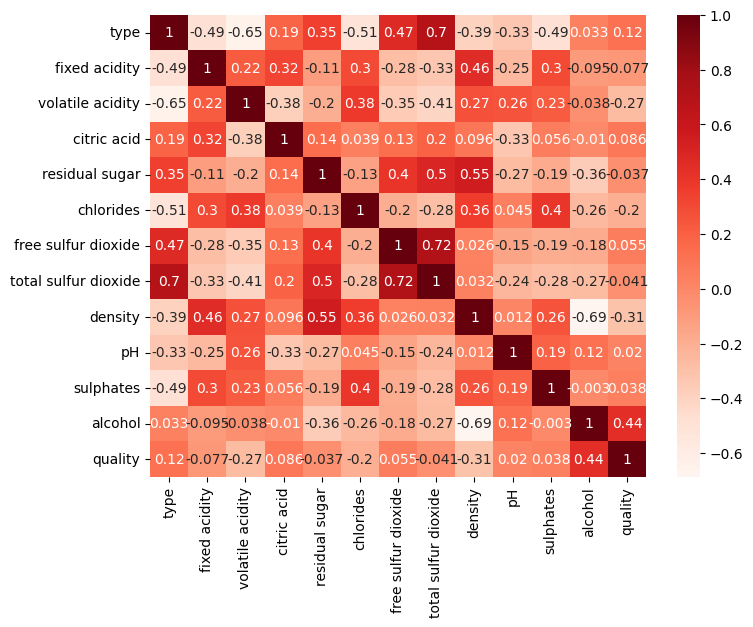

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(dataFrame.corr(), annot=True, cmap='Reds')
plt.show()

#### Train SVM Model

In [8]:
X = dataFrame.drop('type', axis=1)
y = dataFrame['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
# Initialize scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'MaxAbsScaler': MaxAbsScaler(),
}

In [10]:
# Train SVM models for each scaler and store results in a dictionary
results = {}

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
results['Initial DataFrame'] = accuracy

for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    svm_model.fit(X_train_scaled, y_train)
    
    y_pred = svm_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    results[scaler_name] = accuracy

In [11]:
# Create a pandas DataFrame from the results
results_df = pd.DataFrame(list(results.items()), columns=['Scaler', 'Accuracy'])
display(results_df)

,Scaler,Accuracy
0,Initial DataFrame,0.932821
1,StandardScaler,0.995897
2,MinMaxScaler,0.995385
3,MaxAbsScaler,0.986154


Как видно из таблицы что начальные данные не дают хорошей точности, из этого можно сделать вывод что наборе данных есть некоторые нестандартные значения (outliers)

Лучшую точность показывает стандартный скалер это означает что все данные датасета распределены в пределах средних значений что и дает такой хороший результат

#### Explore how different kernels influence the decision boundary

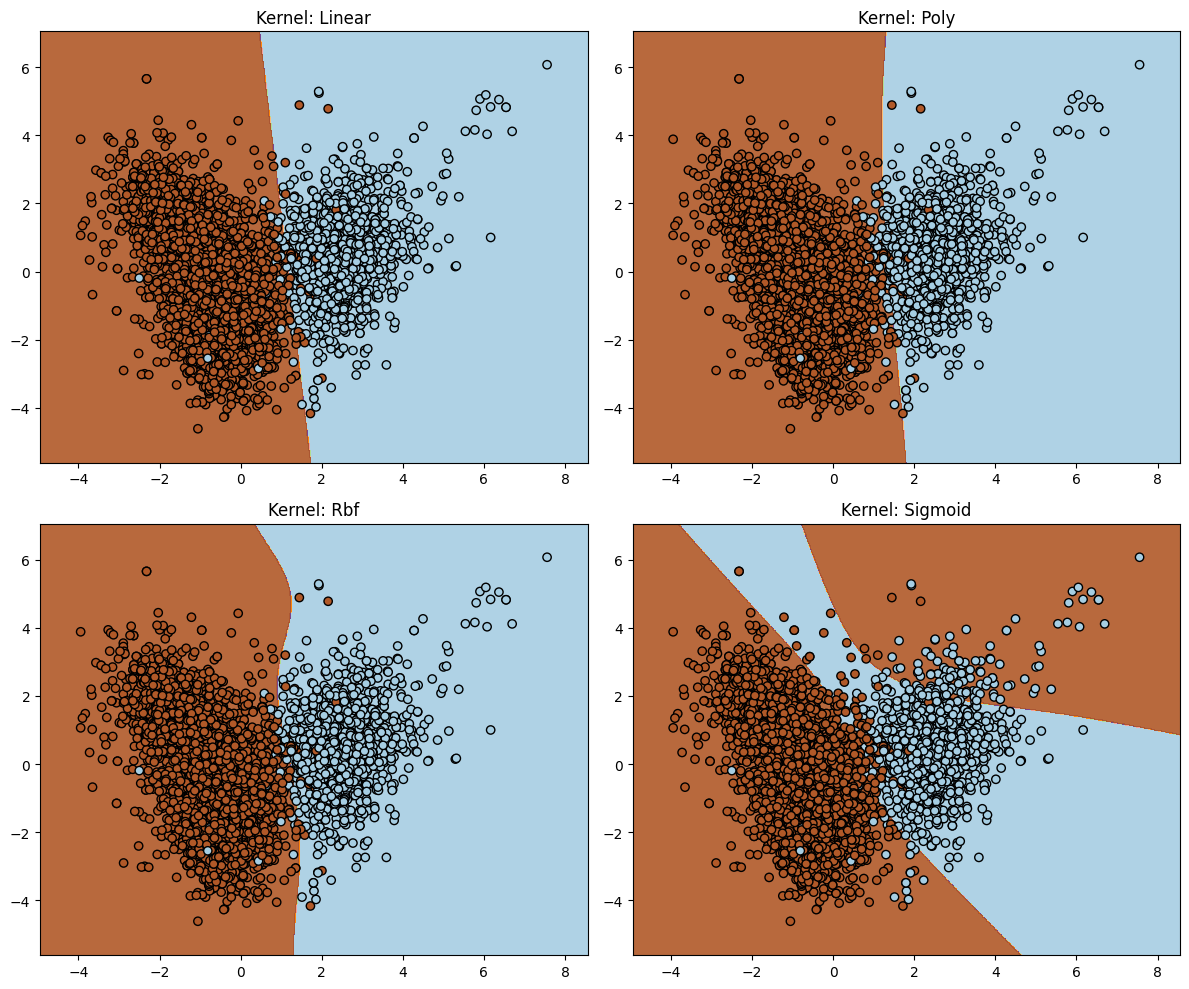

In [12]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Kernels to explore
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, kernel in enumerate(kernels):
    # Train SVM model with different kernels
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train_pca, y_train)

    # Plot decision boundary
    ax = axes[i // 2, i % 2]

    h = .02  # step size in the mesh
    x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
    y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.9)
    ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o')

    ax.set_title(f'Kernel: {kernel.capitalize()}')

plt.tight_layout()
plt.show()

По графикам видно что хуже всего с классификацией справился sigmoid так как он определил многие значения как другого типа

Лучше всего справились Rbf и Poly они лучше всего разделили данные на кластеры а также хорошо справились с выбросами (outliers)